In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Enable inline plotting for Jupyter note.
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data_set = datasets.MNIST(root='Home Work', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='Home Work', train=False, download=True, transform=transform)

In [4]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: Home Work
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: Home Work
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
batch_sizes = [5, 25, 125, 500, 1000]
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

train_loader3 = DataLoader(train_data_set, batch_size=batch_sizes[2], shuffle=True)
test_loader3 = DataLoader(test_data_set, batch_size=batch_sizes[2], shuffle=True)

train_loader4 = DataLoader(train_data_set, batch_size=batch_sizes[3], shuffle=True)
test_loader4 = DataLoader(test_data_set, batch_size=batch_sizes[3], shuffle=True)

train_loader5 = DataLoader(train_data_set, batch_size=batch_sizes[4], shuffle=True)
test_loader5 = DataLoader(test_data_set, batch_size=batch_sizes[4], shuffle=True)



In [7]:
def calculate_params(model):
    total_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return total_params


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel1(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=20, output_size=10):
        super(FeedForwardModel1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [9]:
model1 = FeedForwardModel1()  


In [10]:
model1

FeedForwardModel1(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [11]:
model1params = calculate_params(model1)  
print(f"Total parameters in Model1: {model1params}")


Total parameters in Model1: 16330


In [12]:
loss_function_one = nn.CrossEntropyLoss()  # Define the loss function


In [13]:
optimizer_one = torch.optim.Adam(model1.parameters(), lr=0.001)

In [14]:
epochs = 10
train_correct_one = []
test_correct_one = []

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')  # Print the current epoch count

    train_corr = 0
    test_corr = 0
    running_loss = 0.0

    for batch_idx, (X_train, y_train) in enumerate(train_loader1):
        y_pred = model1(X_train.view(X_train.size(0), -1))  # Flatten the input
        loss = loss_function_one(y_pred, y_train)
        running_loss += loss.item()

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optimizer_one.zero_grad()
        loss.backward()
        optimizer_one.step()

    epoch_loss = running_loss / len(train_loader1)
    train_losses_one = epoch_loss
    train_correct_one.append(train_corr)

    running_loss_test = 0.0

    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader1):
            y_val = model1(X_test.view(X_test.size(0), -1))  # Flatten the input
            loss = loss_function_one(y_val, y_test)
            running_loss_test += loss.item()

            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    test_loss = running_loss_test / len(test_loader1)
    test_losses_one = test_loss
    test_correct_one.append(test_corr)

    train_accuracy = train_corr / len(train_data_set) * 100
    test_accuracy = test_corr / len(test_data_set) * 100
    print(f'Train Loss: {epoch_loss:.4f}, Train Correct: {train_corr}, '
          f'Test Loss: {test_loss:.4f}, Test Correct: {test_corr}, '
          f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10
Train Loss: 0.3582, Train Correct: 53721, Test Loss: 0.2124, Test Correct: 9363, Train Accuracy: 89.53%, Test Accuracy: 93.63%
Epoch 2/10
Train Loss: 0.1997, Train Correct: 56478, Test Loss: 0.1597, Test Correct: 9528, Train Accuracy: 94.13%, Test Accuracy: 95.28%
Epoch 3/10
Train Loss: 0.1625, Train Correct: 57073, Test Loss: 0.1459, Test Correct: 9558, Train Accuracy: 95.12%, Test Accuracy: 95.58%
Epoch 4/10
Train Loss: 0.1392, Train Correct: 57450, Test Loss: 0.1476, Test Correct: 9557, Train Accuracy: 95.75%, Test Accuracy: 95.57%
Epoch 5/10
Train Loss: 0.1244, Train Correct: 57775, Test Loss: 0.1581, Test Correct: 9541, Train Accuracy: 96.29%, Test Accuracy: 95.41%
Epoch 6/10
Train Loss: 0.1177, Train Correct: 57839, Test Loss: 0.1326, Test Correct: 9610, Train Accuracy: 96.40%, Test Accuracy: 96.10%
Epoch 7/10
Train Loss: 0.1100, Train Correct: 58030, Test Loss: 0.1229, Test Correct: 9651, Train Accuracy: 96.72%, Test Accuracy: 96.51%
Epoch 8/10
Train Loss: 0.1035, Tra

In [16]:
train_losses_mod1= train_losses_one



In [17]:
 for t in train_correct_one:
    trn_accu_mod1=t/600
    
print(trn_accu_mod1)

tensor(97.0317)


In [18]:
 for t in test_correct_one:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(96.2900)


In [19]:
# Calculate sensitivity of every model
sensitivity_list = []

# Model 1
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model1.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)


In [61]:
#######################################----------Model-2------------#####################################################################

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel2(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=20, output_size=10):
        super(FeedForwardModel2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [21]:
model2=FeedForwardModel2()

In [22]:
model2

FeedForwardModel2(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [23]:
model2params = calculate_params(model2)  # Use the rephrased calculate_params function
print(f"Total parameters in Model2: {model2params}")


Total parameters in Model2: 16330


In [24]:
loss_function_two = nn.CrossEntropyLoss()


In [28]:
optimizer_two = torch.optim.Adam(model2.parameters(), lr=0.001)

In [29]:
epochs = 10
train_correct_two = []
test_correct_two = []

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')  # Print the current epoch count
    train_corr = 0
    test_corr = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader2):
        
        y_pred = model2(X_train.view(X_train.size(0), -1))  # Flatten the input dynamically
        loss = loss_function_two(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optimizer_two.zero_grad()  # Renamed from adam_optimizer_two
        loss.backward()
        optimizer_two.step()
        
    train_losses_two = loss
    train_correct_two.append(train_corr)
        
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader2):

            y_val = model2(X_test.view(X_test.size(0), -1))  # Flatten the input dynamically
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()
    
    loss = loss_function_two(y_val, y_test)
    test_losses_two = loss
    test_correct_two.append(test_corr)
    
    train_accuracy = train_corr / len(train_data_set) * 100
    test_accuracy = test_corr / len(test_data_set) * 100
    print(f'Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10
Train Accuracy: 87.60%, Test Accuracy: 92.65%
Epoch 2/10
Train Accuracy: 93.47%, Test Accuracy: 93.49%
Epoch 3/10
Train Accuracy: 94.60%, Test Accuracy: 94.95%
Epoch 4/10
Train Accuracy: 95.32%, Test Accuracy: 95.35%
Epoch 5/10
Train Accuracy: 95.80%, Test Accuracy: 95.77%
Epoch 6/10
Train Accuracy: 96.22%, Test Accuracy: 95.79%
Epoch 7/10
Train Accuracy: 96.47%, Test Accuracy: 95.45%
Epoch 8/10
Train Accuracy: 96.72%, Test Accuracy: 96.03%
Epoch 9/10
Train Accuracy: 96.83%, Test Accuracy: 96.07%
Epoch 10/10
Train Accuracy: 97.03%, Test Accuracy: 96.27%


In [30]:
train_losses_mod2= train_losses_two.detach().numpy()

In [32]:
 for t in train_correct_two:
    trn_accu_mod2=t/600
    
print(trn_accu_mod2)

tensor(97.0333)


In [33]:
 for t in test_correct_two:
    tst_accu_mod2=t/100
    
print(tst_accu_mod2)

tensor(96.2700)


In [34]:
# Calculating sensitivity of every model2

# Model 2
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model2.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)



In [73]:
#######################################----------Model-3------------#####################################################################

In [40]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel3(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=20, output_size=10):
        super(FeedForwardModel3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [41]:
model3=FeedForwardModel3()

In [42]:
model3

FeedForwardModel3(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [44]:
model3params = calculate_params(model3)  
print(f"Total trainable parameters in Model3: {model3params}")


Total trainable parameters in Model3: 16330


In [45]:
loss_function_three = nn.CrossEntropyLoss()


In [46]:
optimizer_three = torch.optim.Adam(model3.parameters(), lr=0.001)


In [47]:
epochs = 10
train_correct_three = []
test_correct_three = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader3):
       
        y_pred = model3(X_train.view(X_train.size(0), -1))  # Dynamically flatten the input
        loss = loss_function_three(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optimizer_three.zero_grad()
        loss.backward()
        optimizer_three.step()
        
    train_losses_three = loss
    train_correct_three.append(train_corr)
        
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader3):

            y_val = model3(X_test.view(X_test.size(0), -1))  # Dynamically flatten the input
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    loss = loss_function_three(y_val, y_test)
    test_losses_three = loss
    test_correct_three.append(test_corr)

    # Calculate and print accuracy for the epoch
    train_accuracy = train_corr / len(train_data_set) * 100
    test_accuracy = test_corr / len(test_data_set) * 100
    print(f'Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Accuracy: 78.66%, Test Accuracy: 90.44%
Epoch 2/10, Train Accuracy: 91.35%, Test Accuracy: 92.52%
Epoch 3/10, Train Accuracy: 92.92%, Test Accuracy: 93.50%
Epoch 4/10, Train Accuracy: 93.76%, Test Accuracy: 93.93%
Epoch 5/10, Train Accuracy: 94.43%, Test Accuracy: 94.55%
Epoch 6/10, Train Accuracy: 94.82%, Test Accuracy: 94.88%
Epoch 7/10, Train Accuracy: 95.21%, Test Accuracy: 95.08%
Epoch 8/10, Train Accuracy: 95.38%, Test Accuracy: 95.21%
Epoch 9/10, Train Accuracy: 95.53%, Test Accuracy: 95.27%
Epoch 10/10, Train Accuracy: 95.75%, Test Accuracy: 95.34%


In [48]:
train_losses_mod3= train_losses_three.detach().numpy()

In [49]:
for t in train_correct_three:
    trn_accu_mod3=t/600
    
print(trn_accu_mod3)

tensor(95.7550)


In [51]:
 for t in test_correct_three:
    tst_accu_mod3=t/100
    
print(tst_accu_mod3)

tensor(95.3400)


In [52]:
# Calculating sensitivity of every model3

# Model 3
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model3.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [85]:
#######################################----------Model-4------------#####################################################################

In [59]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel4(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=20, output_size=10):
        super(FeedForwardModel4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [60]:
model4=FeedForwardModel4()

In [61]:
model4

FeedForwardModel4(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [63]:
model4params = calculate_params(model4)  
print(f"Total trainable parameters in Model4: {model4params}")


Total trainable parameters in Model4: 16330


In [64]:
loss_function_four = nn.CrossEntropyLoss()


In [65]:
optimizer_four = torch.optim.Adam(model4.parameters(), lr=0.001)


In [66]:
epochs = 10
train_correct_four = []
test_correct_four = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader4):
        
        y_pred = model4(X_train.view(X_train.size(0), -1))  # Flatten the input dynamically
        loss = loss_function_four(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optimizer_four.zero_grad()
        loss.backward()
        optimizer_four.step()
        
    train_losses_four = loss
    train_correct_four.append(train_corr)
        
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader4):

            y_val = model4(X_test.view(X_test.size(0), -1))  # Flatten the input dynamically
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    loss = loss_function_four(y_val, y_test)
    test_losses_four = loss
    test_correct_four.append(test_corr)

    # Calculate and print accuracy for the epoch
    train_accuracy = train_corr / len(train_data_set) * 100
    test_accuracy = test_corr / len(test_data_set) * 100
    print(f'Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Accuracy: 61.72%, Test Accuracy: 86.95%
Epoch 2/10, Train Accuracy: 88.40%, Test Accuracy: 90.45%
Epoch 3/10, Train Accuracy: 90.70%, Test Accuracy: 91.45%
Epoch 4/10, Train Accuracy: 91.65%, Test Accuracy: 92.16%
Epoch 5/10, Train Accuracy: 92.29%, Test Accuracy: 92.65%
Epoch 6/10, Train Accuracy: 92.84%, Test Accuracy: 92.91%
Epoch 7/10, Train Accuracy: 93.21%, Test Accuracy: 93.35%
Epoch 8/10, Train Accuracy: 93.56%, Test Accuracy: 93.81%
Epoch 9/10, Train Accuracy: 93.86%, Test Accuracy: 93.97%
Epoch 10/10, Train Accuracy: 94.25%, Test Accuracy: 94.17%


In [67]:
train_losses_mod4= train_losses_four.detach().numpy()

In [68]:
for t in train_correct_four:
    trn_accu_mod4=t/600
    
print(trn_accu_mod4)

tensor(94.2500)


In [69]:
 for t in test_correct_four:
    tst_accu_mod4=t/100
    
print(tst_accu_mod4)

tensor(94.1700)


In [70]:
# Calculating sensitivity of every model4

# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model4.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [53]:
#######################################----------Model-5------------#####################################################################

In [71]:
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardModel5(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=20, output_size=10):
        super(FeedForwardModel5, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output_layer(x)
        return x


In [72]:
model5=FeedForwardModel5()

In [73]:
model5

FeedForwardModel5(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [74]:
model5params = calculate_params(model5)  
print(f"Total trainable parameters in Model5: {model5params}")


Total trainable parameters in Model5: 16330


In [75]:
loss_function_five = nn.CrossEntropyLoss()


In [76]:
optimizer_five = torch.optim.Adam(model5.parameters(), lr=0.001)


In [77]:
epochs = 10
train_correct_five = []
test_correct_five = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    for batch_idx, (X_train, y_train) in enumerate(train_loader5):
       
        y_pred = model5(X_train.view(X_train.size(0), -1))  # Flatten the input dynamically
        loss = loss_function_five(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optimizer_five.zero_grad()
        loss.backward()
        optimizer_five.step()
        
    train_losses_five = loss
    train_correct_five.append(train_corr)
        
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader5):

            y_val = model5(X_test.view(X_test.size(0), -1))  # Flatten the input dynamically
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()
    
    loss = loss_function_five(y_val, y_test)
    test_losses_five = loss
    test_correct_five.append(test_corr)

    # Calculate and print accuracy for the epoch
    train_accuracy = train_corr / len(train_data_set) * 100
    test_accuracy = test_corr / len(test_data_set) * 100
    print(f'Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Train Accuracy: 47.05%, Test Accuracy: 75.01%
Epoch 2/10, Train Accuracy: 81.46%, Test Accuracy: 86.53%
Epoch 3/10, Train Accuracy: 87.75%, Test Accuracy: 89.67%
Epoch 4/10, Train Accuracy: 89.84%, Test Accuracy: 90.59%
Epoch 5/10, Train Accuracy: 90.75%, Test Accuracy: 91.23%
Epoch 6/10, Train Accuracy: 91.43%, Test Accuracy: 91.65%
Epoch 7/10, Train Accuracy: 91.94%, Test Accuracy: 92.23%
Epoch 8/10, Train Accuracy: 92.37%, Test Accuracy: 92.53%
Epoch 9/10, Train Accuracy: 92.77%, Test Accuracy: 92.76%
Epoch 10/10, Train Accuracy: 93.06%, Test Accuracy: 93.23%


In [82]:
train_losses_mod5= train_losses_five.detach().numpy()

In [83]:
for t in train_correct_five:
    trn_accu_mod5=t/600
    
print(trn_accu_mod5)

tensor(93.0617)


In [84]:
for t in test_correct_five:
    tst_accu_mod5=t/100
    
print(tst_accu_mod5)

tensor(93.2300)


In [85]:
# Calculating sensitivity of every model5

# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model5.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [89]:
train_loss_list=[]
test_loss_list=[]
train_accuracy_list=[]
test_accuracy_list=[]

train_loss_list.append(train_losses_mod1)
train_loss_list.append(train_losses_mod2)
train_loss_list.append(train_losses_mod3)
train_loss_list.append(train_losses_mod4)
train_loss_list.append(train_losses_mod5)

test_loss_list.append(test_losses_one)
test_loss_list.append(test_losses_two)
test_loss_list.append(test_losses_three)
test_loss_list.append(test_losses_four)
test_loss_list.append(test_losses_five)

train_accuracy_list.append(trn_accu_mod1)
train_accuracy_list.append(trn_accu_mod2)
train_accuracy_list.append(trn_accu_mod3)
train_accuracy_list.append(trn_accu_mod4)
train_accuracy_list.append(trn_accu_mod5)


test_accuracy_list.append(tst_accu_mod1)
test_accuracy_list.append(tst_accu_mod2)
test_accuracy_list.append(tst_accu_mod3)
test_accuracy_list.append(tst_accu_mod4)
test_accuracy_list.append(tst_accu_mod5)

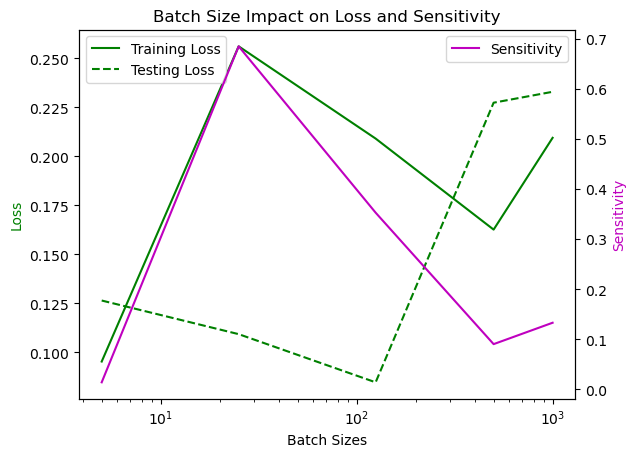

In [92]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(batch_sizes, train_loss_list, 'g', label='Training Loss')
ax1.plot(batch_sizes, test_loss_list, 'g--', label='Testing Loss')

ax2.plot(batch_sizes, sensitivity_list, 'm', label='Sensitivity')

ax1.set_title('Batch Size Impact on Loss and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Sensitivity', color='m')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


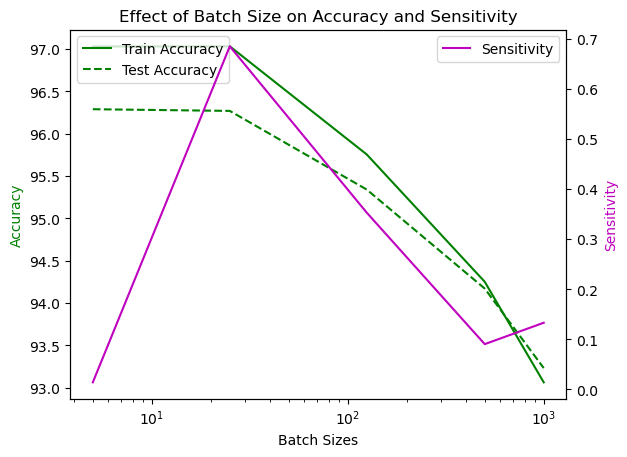

In [93]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(batch_sizes, train_accuracy_list, 'g', label='Train Accuracy')
ax1.plot(batch_sizes, test_accuracy_list, 'g--', label='Test Accuracy')

ax2.plot(batch_sizes, sensitivity_list, 'm', label='Sensitivity')

ax1.set_title('Effect of Batch Size on Accuracy and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='g')
ax2.set_ylabel('Sensitivity', color='m')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
